# Plotting time-series data - Chapter 2

Course provided by Datacamp

Material adapted by me.

In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
climate_change = pd.read_csv('climate_change.csv')


In [3]:
climate_change['relative_temp']

0      0.10
1      0.01
2      0.08
3     -0.05
4      0.06
       ... 
701    0.98
702    0.87
703    0.89
704    0.93
705    0.81
Name: relative_temp, Length: 706, dtype: float64

In [4]:
climate_change['co2']

0      315.71
1      317.45
2      317.50
3         NaN
4      315.86
        ...  
701    402.27
702    401.05
703    401.59
704    403.55
705    404.45
Name: co2, Length: 706, dtype: float64

In [6]:
climate_change.head()

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06


In [ ]:
# DateTime Index
climate_change.index = pd.to_datetime(climate_change['date'])

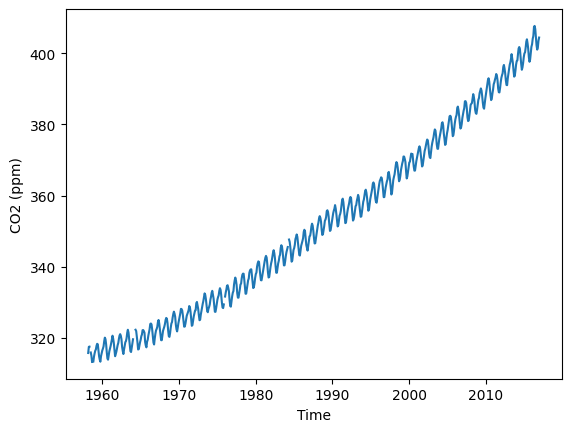

In [ ]:
# Plotting time-series data
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')
plt.show()

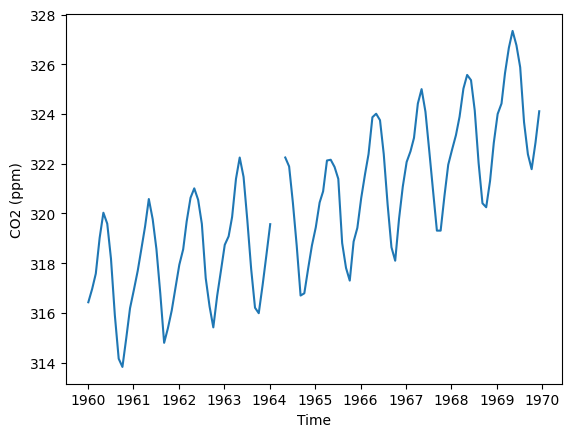

In [12]:
# Zooming in on a decade

sixties = climate_change["1960-01-01":"1969-12-31"]
fig, ax = plt.subplots()
ax.plot(sixties.index, sixties['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')
plt.show()

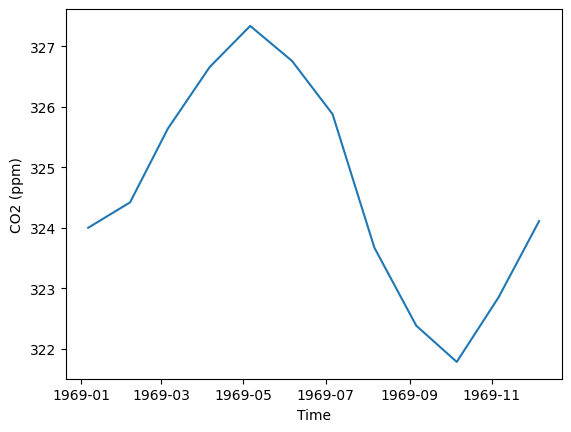

In [13]:
# Zooming in on one year

sixty_nine = climate_change["1969-01-01":"1969-12-31"]
fig, ax = plt.subplots()
ax.plot(sixty_nine.index, sixty_nine['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')
plt.show()

## Plotting time-series with different variables

In [ ]:
# Plotting 2 times-series together

climate_change = pd.read_csv('climate_change.csv', parse_dates=["date"], index_col="date")

climate_change

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06
...,...,...
2016-08-06,402.27,0.98
2016-09-06,401.05,0.87
2016-10-06,401.59,0.89


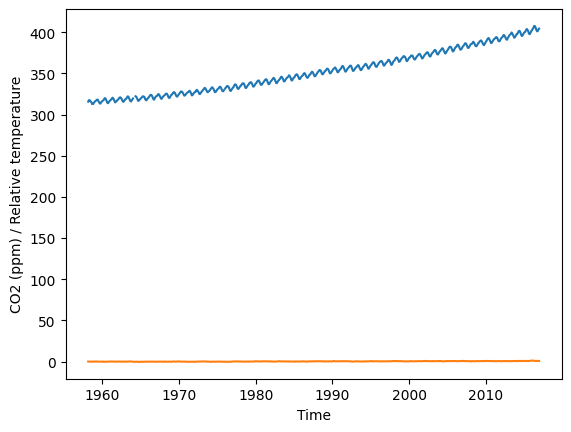

In [15]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"])
ax.plot(climate_change.index, climate_change["relative_temp"])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm) / Relative temperature')
plt.show()

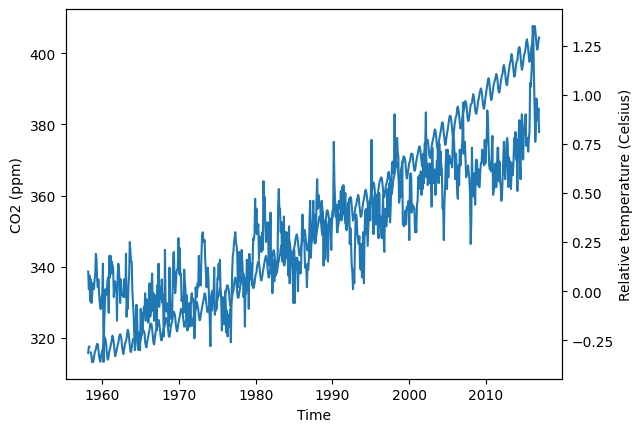

In [16]:
# Using twin axes

fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')
ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change["relative_temp"])
ax2.set_ylabel('Relative temperature (Celsius)')
plt.show()

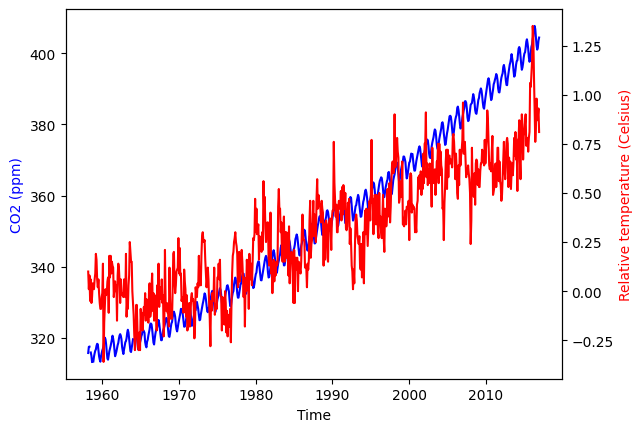

In [17]:
# Separating variables by color

fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"], color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)', color='blue')
ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change["relative_temp"], color='red')
ax2.set_ylabel('Relative temperature (Celsius)', color='red')
plt.show()

In [18]:
# A function that plots time-series data

def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)


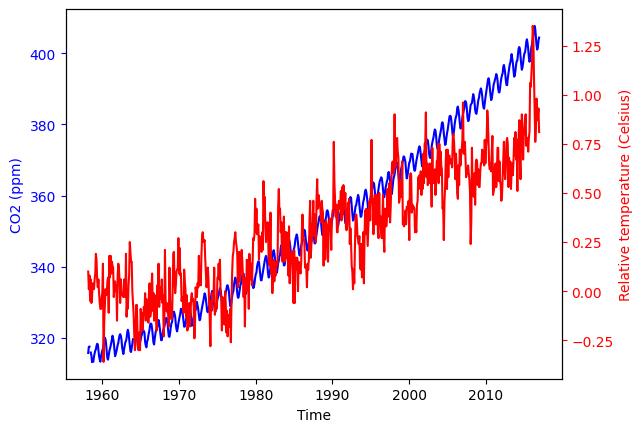

In [19]:
# Using the function
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'],'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'],'red', 'Time', 'Relative temperature (Celsius)')
plt.show()

## Annotating time-series data

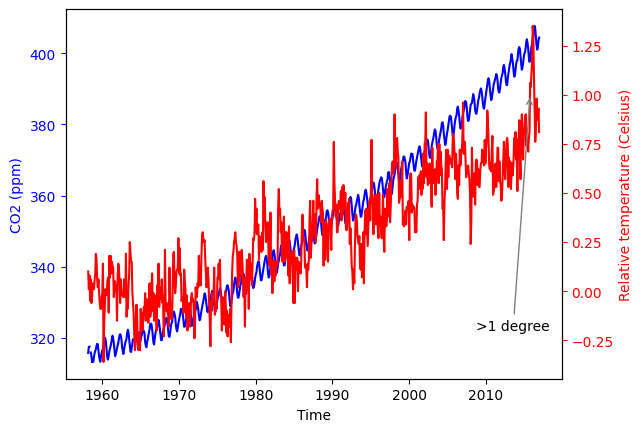

In [22]:
# Annotation

fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'],'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'],'red', 'Time', 'Relative temperature (Celsius)')
#Positioning the text and arrow
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={"arrowstyle":"->", "color":"gray"})
plt.show()
